### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime

import wbdata
# https://databank.worldbank.org/metadataglossary/world-development-indicators/series/NY.GNP.MKTP.CD

import requests
from bs4 import BeautifulSoup

from getpass import getpass
from mysql.connector import connect, Error

import warnings
warnings.filterwarnings("ignore")

### Countries

In [2]:
### wbdata.get_country output includes countries and regions in one list
countries_and_regions = wbdata.get_country() 

### the following is the list of all entries but countries in the extracted record
regions = ['Arab World', 
           'Euro area',
           'East Asia & Pacific (IBRD-only countries)',
           'Europe & Central Asia (IBRD-only countries)',
           'IBRD countries classified as high income', 
           'Latin America & the Caribbean (IBRD-only countries)',
           'Middle East & North Africa (IBRD-only countries)',
           'Sub-Saharan Africa (IBRD-only countries)',
           'Sub-Saharan Africa (IFC classification)',
           'East Asia and the Pacific (IFC classification)',
           'Latin America and the Caribbean (IFC classification)',
           'Middle East and North Africa (IFC classification)',
           'South Asia (IFC classification)',
           'East Asia & Pacific (IDA-eligible countries)',
           'Europe & Central Asia (IDA-eligible countries)',
           'IDA countries classified as Fragile Situations',
           'Latin America & the Caribbean (IDA-eligible countries)',
           'Middle East & North Africa (IDA-eligible countries)',
           'IDA countries not classified as Fragile Situations',
           'IDA countries in Sub-Saharan Africa not classified as fragile situations ',
           'South Asia (IDA-eligible countries)',
           'IDA countries in Sub-Saharan Africa classified as fragile situations ',
           'Sub-Saharan Africa (IDA-eligible countries)',
           'Central Europe and the Baltics',
           'Europe and Central Asia (IFC classification)',
           'East Asia & Pacific (excluding high income)',
           'Early-demographic dividend',
           'East Asia & Pacific',
           'Europe & Central Asia (excluding high income)',
           'Europe & Central Asia', 
           'European Union', 
           'Fragile and conflict affected situations', 
           'High income',
           'IDA countries classified as fragile situations, excluding Sub-Saharan Africa',
           'Heavily indebted poor countries (HIPC)',
           'IBRD, including blend',
           'IBRD only',
           'IDA & IBRD total',
           'IDA total',
           'IDA blend',
           'IDA only','Not classified',
           'Latin America & Caribbean (excluding high income)', 
           'Latin America & Caribbean ',
           'Least developed countries: UN classification',
           'Low income', 
           'Lower middle income', 
           'Low & middle income', 
           'Late-demographic dividend', 
           'Middle East (developing only)', 
           'Middle East & North Africa', 
           'Middle East & North Africa (excluding high income)',
           'Middle income',
           'North America', 
           'North Africa', 
           'Non-resource rich Sub-Saharan Africa countries', 
           'IDA countries not classified as fragile situations, excluding Sub-Saharan Africa',
           'OECD members', 
           'Other small states', 
           'Pre-demographic dividend', 
           'Pacific island small states',
           'Post-demographic dividend', 
           'Resource rich Sub-Saharan Africa countries', 
           'South Asia',
           'Sub-Saharan Africa (excluding high income)', 
           'Sub-Saharan Africa ',
           'Small states', 'Sint Maarten (Dutch part)',
           'Sub-Saharan Africa excluding South Africa',
           'East Asia & Pacific (IDA & IBRD countries)',
           'Europe & Central Asia (IDA & IBRD countries)',
           'Latin America & the Caribbean (IDA & IBRD countries)',
           'Middle East & North Africa (IDA & IBRD countries)',
           'South Asia (IDA & IBRD)',
           'Sub-Saharan Africa (IDA & IBRD countries)',
           'Upper middle income', 
           #'World',
           'Sub-Saharan Africa excluding South Africa and Nigeria',
           'Caribbean small states',
          ]

### will filter list to exclude regions and save filtered list as countries
countries = []

for i in range(len(countries_and_regions)):
    if countries_and_regions[i]['name'] not in regions:
        countries.append(countries_and_regions[i]['name'])

In [3]:
print(f"There are {len(countries)} countries in the list and the world")

There are 219 countries in the list and the world


In [4]:
### To separate countries by geopgraphy and income levels, will scrape another list from data.worldbank.org

### scrape data for regions
headers = {'User-Agent': ''} ### pass in your user-agent
base_url = "https://data.worldbank.org"

regions = requests.get(base_url + '/' + 'country', headers=headers, timeout=5)
print("Status code: ", regions.status_code)

regions_content = regions.content
regions_soup = BeautifulSoup(regions_content, 'html')
links = regions_soup.find_all('li', class_='overview-list-item')
    
regions_url = []

for l in range(len(links)):
    link = base_url + links[l].find('a')['href']
    regions_url.append(link)
    
regions_countries = {}

for url in regions_url:
    html = requests.get(url, headers=headers, timeout=3)
    content = html.content
    soup = BeautifulSoup(content, 'html')
    
    labels = []
    
    lists = soup.find_all('li', class_ = 'label')
    
    for l in range(len(lists)):
        region_countries = lists[l].get_text()
        labels.append(region_countries)
        region = url.replace(base_url,'').replace('/region/','').replace('/income-level/','').replace('?view=chart','')
        regions_countries[region]=labels

Status code:  200


In [5]:
for key, v in  regions_countries.items():
    print(key)

east-asia-and-pacific
europe-and-central-asia
latin-america-and-caribbean
middle-east-and-north-africa
north-america
south-asia
sub-saharan-africa
high-income
low-and-middle-income
low-income
lower-middle-income
middle-income
upper-middle-income
ibrd-only
ida-blend
ida-only
early-demographic-dividend
late-demographic-dividend
post-demographic-dividend
pre-demographic-dividend
caribbean-small-states
other-small-states
pacific-island-small-states
small-states
arab-world
central-europe-and-the-baltics
east-asia-and-pacific-excluding-high-income
euro-area
europe-and-central-asia-excluding-high-income
european-union
fragile-and-conflict-affected-situations
heavily-indebted-poor-countries-hipc
latin-america-and-caribbean-excluding-high-income
least-developed-countries-un-classification
middle-east-and-north-africa-excluding-high-income
oecd-members
sub-saharan-africa-excluding-high-income
world


In [6]:
geography = ['east-asia-and-pacific',
             'europe-and-central-asia',
             'latin-america-and-caribbean', 
             'middle-east-and-north-africa', 
             'north-america', 
             'south-asia', 
             'sub-saharan-africa']
geographical_regions = {k: v for k, v in regions_countries.items() if k in geography}


income_levels = ['high-income', 
                 'low-income',
                 'middle-income']
income_regions = {k: v for k, v in regions_countries.items() if k in income_levels}

### Helper functions

In [7]:
def define_region(country):
    for key in geographical_regions.keys():
        for value in geographical_regions[key]:
            if country in value:
                return key
            
def define_income_region(country):
    for key in income_regions.keys():
        for value in income_regions[key]:
            if country in value:
                return key

def get_data(indicator, start, end):
    data_date = (datetime.datetime(start,1,1), datetime.datetime(end,1,1))
    data = wbdata.get_data(indicator, data_date=data_date)
    
    # convert to df
    df = pd.DataFrame(data)[['date', 'country', 'value']]
    df['country'] = df['country'].apply(lambda x: x['value'])
    # filter out regions from countries column
    df = df[df['country'].isin(countries)]
    # add region as a column
    df['region'] = df['country'].apply(lambda x: define_region(x))
    # add income level as a column
    df['income_level'] = df['country'].apply(lambda x: define_income_region(x))
    # rename value column by name of indicator
    indicator_for = data[0]['indicator']['value'].replace(' ','_').replace(',','')
    df.columns = ['year', 'country', indicator_for, 'region', 'income_level']
    # convert year to date format
    df['year'] = pd.to_datetime(df['year']).apply(lambda x: x.strftime('%Y')) 
    
    # convert to list for db
    data_list = []
    for i in range(len(data)):
        if data[i]['country']['value'] in countries:
            data_list.append((data[i]['date'],
                              data[i]['country']['value'], 
                              define_region(data[i]['country']['value']),
                              define_income_region(data[i]['country']['value']),
                              data[i]['value']))
            
    return df, data_list

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def highlight_min(s):
    '''
    highlight the minimum in a Series red.
    '''
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

### Population
- SP.POP.TOTL (Population, total)
- SP.POP.GROW (Population growth (annual %))  
- SP.POP.TOTL.FE.ZS (Population, female (% of total population))
- SP.POP.TOTL.MA.ZS (Population, male (% of total population))  

#### Get Data

In [8]:
start = 2009
end = 2019 # data for 2020 is not available yet
population_df, population_list = get_data('SP.POP.TOTL', end, start)
population_df.tail(3)

,year,country,Population_total,region,income_level
2901,2011,Zimbabwe,12894316.0,sub-saharan-africa,middle-income
2902,2010,Zimbabwe,12697723.0,sub-saharan-africa,middle-income
2903,2009,Zimbabwe,12526968.0,sub-saharan-africa,middle-income


In [9]:
len(population_df)

2387

In [10]:
population_growth_df, population_growth_list = get_data('SP.POP.GROW', end, start)
population_growth_df.tail(3)

,year,country,Population_growth_(annual_%),region,income_level
2901,2011,Zimbabwe,1.536391,sub-saharan-africa,middle-income
2902,2010,Zimbabwe,1.353893,sub-saharan-africa,middle-income
2903,2009,Zimbabwe,1.183792,sub-saharan-africa,middle-income


In [11]:
len(population_growth_df)

2387

In [12]:
population_female_df, population_female_list = get_data('SP.POP.TOTL.FE.ZS', end, start)
population_female_df.tail(3)

,year,country,Population_female_(%_of_total_population),region,income_level
2901,2011,Zimbabwe,52.389009,sub-saharan-africa,middle-income
2902,2010,Zimbabwe,52.361367,sub-saharan-africa,middle-income
2903,2009,Zimbabwe,52.339905,sub-saharan-africa,middle-income


In [13]:
len(population_female_df)

2387

In [14]:
population_male_df, population_male_list = get_data('SP.POP.TOTL.MA.ZS', end, start)
population_male_df.tail(3)

,year,country,Population_male_(%_of_total_population),region,income_level
2901,2011,Zimbabwe,47.610991,sub-saharan-africa,middle-income
2902,2010,Zimbabwe,47.638633,sub-saharan-africa,middle-income
2903,2009,Zimbabwe,47.660095,sub-saharan-africa,middle-income


In [15]:
len(population_male_df)

2387

### GDP

- NY.GDP.MKTP.CD              GDP (current US$)  

- NY.GDP.MKTP.KD.ZG           GDP growth (annual %)  

- NY.GDP.PCAP.KD.ZG           GDP per capita growth (annual %)  

- NY.GDP.PCAP.PP.CD           GDP per capita, PPP (current international $)  

#### Get Primary data

In [16]:
### Need these dictionaries to run functions
import json

income_regions = json.load(open("income_regions.json"))
geographical_regions = json.load(open("geographical_regions.json"))
regions_countries = json.load(open("regions_countries.json"))

In [17]:
### GDP data from world bank via API
start = 2009
end = 2019 # data for 2020 is not available yet
gdp_df, gdp_list = get_data('NY.GDP.MKTP.CD', end, start)
gdp_df.tail(3)

,year,country,GDP_(current_US$),region,income_level
2901,2011,Zimbabwe,1.410192e+10,sub-saharan-africa,middle-income
2902,2010,Zimbabwe,1.204166e+10,sub-saharan-africa,middle-income
2903,2009,Zimbabwe,9.665793e+09,sub-saharan-africa,middle-income


In [18]:
print(len(gdp_df))

2387


In [19]:
start = 2009
end = 2019 # data for 2020 is not available yet
gdp_growth_df, gdp_growth_list = get_data('NY.GDP.MKTP.KD.ZG', end, start)
gdp_growth_df.tail(3)

,year,country,GDP_growth_(annual_%),region,income_level
2901,2011,Zimbabwe,14.193913,sub-saharan-africa,middle-income
2902,2010,Zimbabwe,19.675323,sub-saharan-africa,middle-income
2903,2009,Zimbabwe,12.019560,sub-saharan-africa,middle-income


In [20]:
print(len(gdp_growth_df))

2387


In [21]:
start = 2009
end = 2019 # data for 2020 is not available yet
gdp_ppp_df, gdp_ppp_list = get_data('NY.GDP.PCAP.PP.CD', end, start)
gdp_ppp_df.tail(3)

,year,country,GDP_per_capita_PPP_(current_international_$),region,income_level
2901,2011,Zimbabwe,2101.825192,sub-saharan-africa,middle-income
2902,2010,Zimbabwe,1830.828054,sub-saharan-africa,middle-income
2903,2009,Zimbabwe,1532.821096,sub-saharan-africa,middle-income


In [22]:
print(len(gdp_ppp_df))

2387


In [23]:
start = 2009
end = 2019 # data for 2020 is not available yet
gdp_ppp_growth_df, gdp_ppp_growth_list = get_data('NY.GDP.PCAP.KD.ZG', end, start)
gdp_ppp_growth_df.tail(3)

,year,country,GDP_per_capita_growth_(annual_%),region,income_level
2901,2011,Zimbabwe,12.452857,sub-saharan-africa,middle-income
2902,2010,Zimbabwe,18.065967,sub-saharan-africa,middle-income
2903,2009,Zimbabwe,10.701299,sub-saharan-africa,middle-income


#### World GDP by region and income levels

In [24]:
### all extracted df related to gdp of equal length, will merge them into one

gdp = pd.concat([gdp_df, 
                     gdp_growth_df["GDP_growth_(annual_%)"],
                     gdp_ppp_df["GDP_per_capita_PPP_(current_international_$)"],
                     gdp_ppp_growth_df["GDP_per_capita_growth_(annual_%)"]], axis=1)

### convert gdp to BLN
gdp["GDP_(current_US$)"] = gdp["GDP_(current_US$)"].apply(lambda x: x/1000000000)

### rename converted column
gdp = gdp.rename({"GDP_(current_US$)": "GDP_(current_US$)_BLN"}, axis=1)

gdp.head()

,year,country,GDP_(current_US$)_BLN,region,income_level,GDP_growth_(annual_%),GDP_per_capita_PPP_(current_international_$),GDP_per_capita_growth_(annual_%)
506,2019,World,87734.574388,None,None,2.343378,17811.293227,1.254680
507,2018,World,86439.423192,None,None,2.976776,17200.751285,1.852047
508,2017,World,81306.030232,None,None,3.298628,16262.673315,2.132158
509,2016,World,76368.999871,None,None,2.605790,15592.565643,1.426476
510,2015,World,75217.722629,None,None,2.873949,15176.613665,1.686013


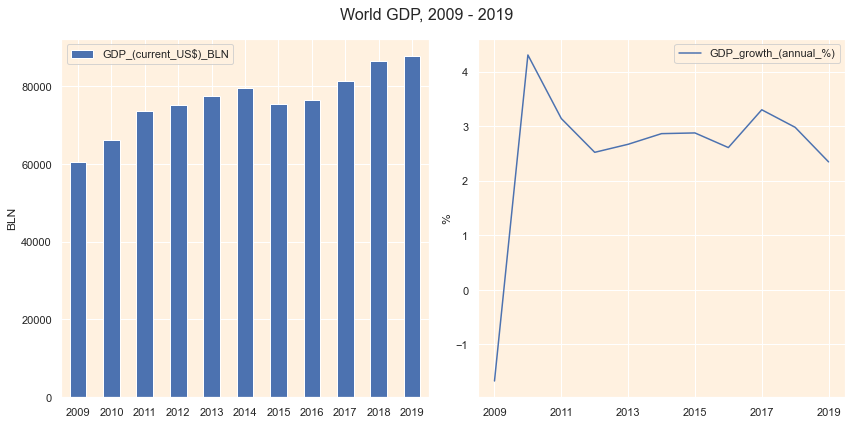

In [25]:
### World gdp and gdp growth
plt.rcParams['axes.facecolor'] = '#FFF1E0'

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(f"World GDP, {start} - {end}", fontsize=16)


gdp[gdp['country']=='World'].sort_values('year').\
    plot(kind='bar', x='year', y='GDP_(current_US$)_BLN', 
         ax=ax1, xlabel='', ylabel='BLN', rot=0)

gdp[gdp['country']=='World'].sort_values('year').\
    plot(kind='line', x='year', y='GDP_growth_(annual_%)', 
         ax=ax2, xlabel ='', ylabel='%', rot=0, grid=True)

plt.tight_layout()
plt.show();

In [26]:
gdp_change = (gdp[(gdp['country']=='World') & (gdp['year']==str(end))]['GDP_(current_US$)_BLN'].values[0] - 
 gdp[(gdp['country']=='World') & (gdp['year']==str(start))]['GDP_(current_US$)_BLN'].values[0])

gdp_gr_change = (gdp[(gdp['country']=='World') & (gdp['year']==str(end))]['GDP_growth_(annual_%)'].values[0] - 
 gdp[(gdp['country']=='World') & (gdp['year']==str(start))]['GDP_growth_(annual_%)'].values[0])

print('-'*70)
print(f"""
For period {start} - {end}
World GDP increased by {round(gdp_change,0)} BLN Current US$,
GDP growth rate increased by {round(gdp_gr_change,5)} %.
""")
print('-'*70)

----------------------------------------------------------------------

For period 2009 - 2019
World GDP increased by 27324.0 BLN Current US$,
GDP growth rate increased by 4.01702 %.

----------------------------------------------------------------------


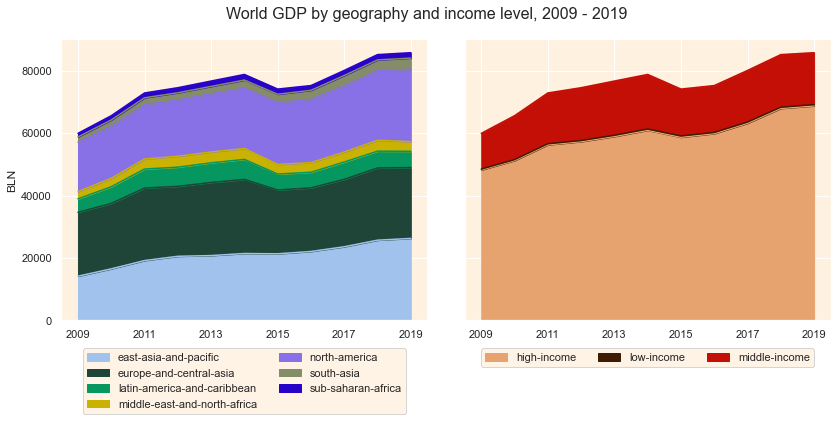

In [27]:
### World GDP by Geographical Region

region_colors = ['#a1c2ed','#1e4537','#06965f','#c9b202','#8870e6','#848c69','#2702c9'] # 7 geography
income_colors = ['#e6a370', '#3d1c02', '#c40f06'] # 3 income

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle(f"World GDP by geography and income level, {start} - {end}", fontsize=16)


gdp[gdp['country']!='World'].\
    groupby(['year','region'])["GDP_(current_US$)_BLN"].sum().\
    unstack().plot.area(ax=ax1, xlabel='', ylabel='BLN', rot=0, color=region_colors)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=2)

gdp[gdp['country']!='World'].\
    groupby(['year','income_level'])["GDP_(current_US$)_BLN"].sum().\
    unstack().plot.area(ax=ax2, xlabel='', rot=0, color=income_colors)

ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3)

plt.tight_layout()
plt.show();

In [28]:
gdp_by_income_level = gdp[gdp['country']!='World'].\
    groupby(['year','income_level'])["GDP_(current_US$)_BLN"].sum().unstack()

gdp_by_income_level['high-income_perc'] = gdp_by_income_level["high-income"] / (gdp_by_income_level["high-income"]+
                                                                                gdp_by_income_level["low-income"]+
                                                                                gdp_by_income_level["middle-income"])

print('-'*70)
print("High income level countries account for 80% of World's GDP and 34% of World population")
print('')
gdp_by_income_level

----------------------------------------------------------------------
High income level countries account for 80% of World's GDP and 34% of World population



income_level,high-income,low-income,middle-income,high-income_perc
year,,,,
2009,48185.098981,284.075223,11453.701748,0.804119
2010,51197.172085,311.400726,14067.393385,0.780731
2011,56248.585894,339.664532,16274.157278,0.771984
2012,57268.378450,354.941341,16924.106167,0.768214
2013,58913.174411,392.943881,17379.011097,0.768248
2014,60895.164837,420.497958,17480.535987,0.772819
2015,58665.954115,425.529045,15019.767472,0.791593
2016,59840.430032,378.822346,15013.781581,0.795401
2017,63155.693612,389.937902,16538.606145,0.788616


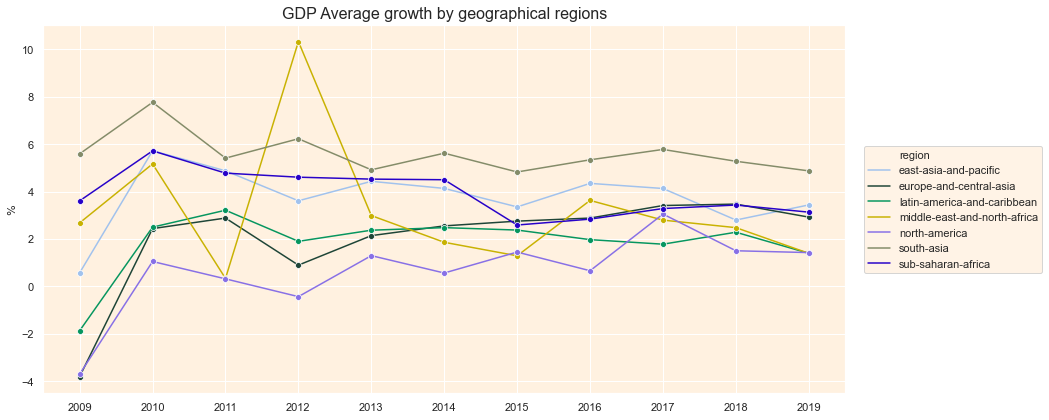

In [29]:
### GDP growth by geographical region

fig = plt.figure(figsize=(12,6))

sns.lineplot(x = 'year', 
             y = "GDP_growth_(annual_%)", 
             hue = 'region', 
             data = gdp.groupby(['year','region'])["GDP_growth_(annual_%)"].mean().reset_index(), 
             marker='o', palette=region_colors)

plt.gca().get_legend().remove()
plt.xlabel('')
plt.ylabel('%')
plt.title("GDP Average growth by geographical regions", fontsize=16)

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.tight_layout()
plt.show()

#### Countries with lowest and highest GDP growth rate

In [30]:
#statistical summary of world gdp annual % growth, 2019

print('-'*70)
print('Statistical summary of World GDP Annual growth:')
print('')
gdp[(gdp['country']!='World') & (gdp['year']=='2019')][["GDP_growth_(annual_%)"]].describe()

----------------------------------------------------------------------
Statistical summary of World GDP Annual growth:



,GDP_growth_(annual_%)
count,188.000000
mean,2.672548
std,3.144446
min,-8.100000
25%,1.116050
50%,2.345002
75%,4.613042
max,18.723525


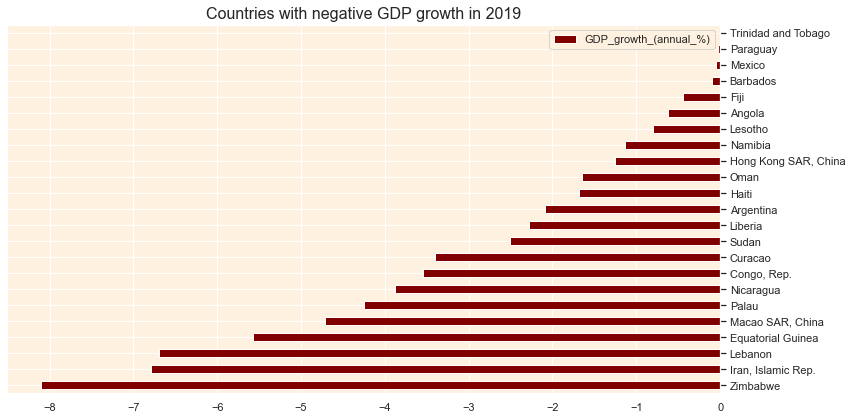

In [31]:
### countries with negative GDP growth
gdp[(gdp['country']!='World') & 
    (gdp["GDP_growth_(annual_%)"] < 0) & 
    (gdp['year']=='2019')].\
    sort_values("GDP_growth_(annual_%)").\
    plot(kind='barh', figsize=(12,6), 
         x='country', y='GDP_growth_(annual_%)', 
         xlabel='', color='maroon')
plt.gca().yaxis.tick_right()
plt.title(f"Countries with negative GDP growth in {end}", fontsize=16)
plt.tight_layout()
plt.show();

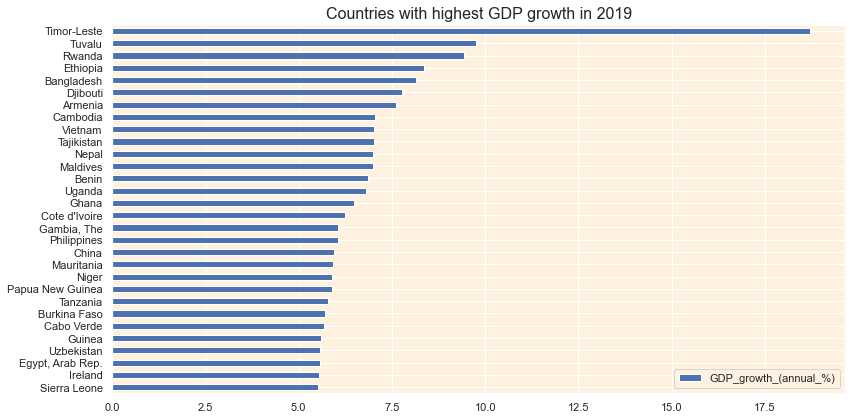

In [32]:
### countries with high GDP growth greater than 5%
gdp[(gdp['country']!='World') & 
    (gdp["GDP_growth_(annual_%)"] > 5.5) & 
    (gdp['year']=='2019')].\
    sort_values("GDP_growth_(annual_%)").\
    plot(kind='barh', figsize=(12,6), 
         x='country', y='GDP_growth_(annual_%)', 
         xlabel='')
#plt.gca().yaxis.tick_right()
plt.title(f"Countries with highest GDP growth in {end}", fontsize=16)
plt.tight_layout()
plt.show();

#### GDP per Capita

In [33]:
gdp[gdp['year']=='2019'][['GDP_per_capita_PPP_(current_international_$)']].describe()

,GDP_per_capita_PPP_(current_international_$)
count,187.000000
mean,22853.543957
std,23594.236171
min,784.926989
25%,5435.141540
50%,14289.960502
75%,32926.896323
max,129451.063933


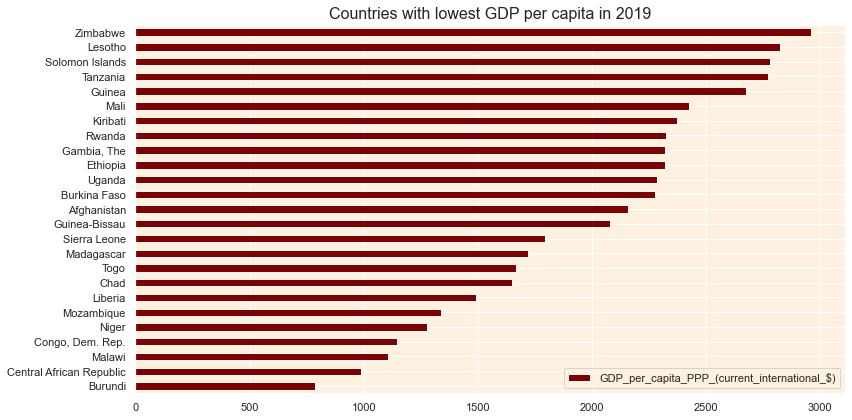

In [34]:
### countries with lowest GDP per capita
gdp[(gdp['country']!='World') & 
    (gdp["GDP_per_capita_PPP_(current_international_$)"] < 3000) & 
    (gdp['year']=='2019')].\
    sort_values("GDP_per_capita_PPP_(current_international_$)").\
    plot(kind='barh', figsize=(12,6), 
         x='country', y='GDP_per_capita_PPP_(current_international_$)', 
         xlabel='', color='maroon')
#plt.gca().yaxis.tick_right()
plt.title(f"Countries with lowest GDP per capita in {end}", fontsize=16)
plt.tight_layout()
plt.show();

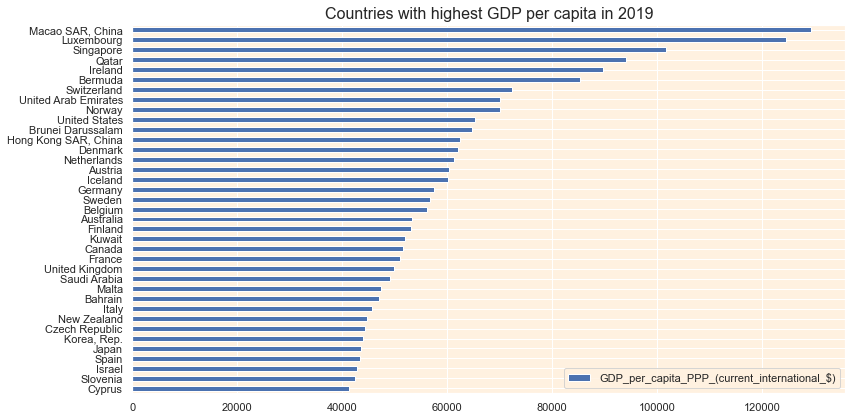

In [35]:
### countries with highest GDP per capita
gdp[(gdp['country']!='World') & 
    (gdp["GDP_per_capita_PPP_(current_international_$)"] > 40000) & 
    (gdp['year']=='2019')].\
    sort_values("GDP_per_capita_PPP_(current_international_$)").\
    plot(kind='barh', figsize=(12,6), 
         x='country', y='GDP_per_capita_PPP_(current_international_$)', 
         xlabel='')
#plt.gca().yaxis.tick_right()
plt.title(f"Countries with highest GDP per capita in {end}", fontsize=16)
plt.tight_layout()
plt.show();

#### GDP growth per capita

In [36]:
gdp[(gdp['country']!='World') & (gdp['year']=='2019')][['GDP_per_capita_growth_(annual_%)']].describe()

,GDP_per_capita_growth_(annual_%)
count,188.000000
mean,1.368023
std,3.104026
min,-9.395470
25%,-0.134949
50%,1.402700
75%,3.164555
max,16.414735


----------------------------------------------------------------------
49 countries had negative per capita GDP growth in 2019



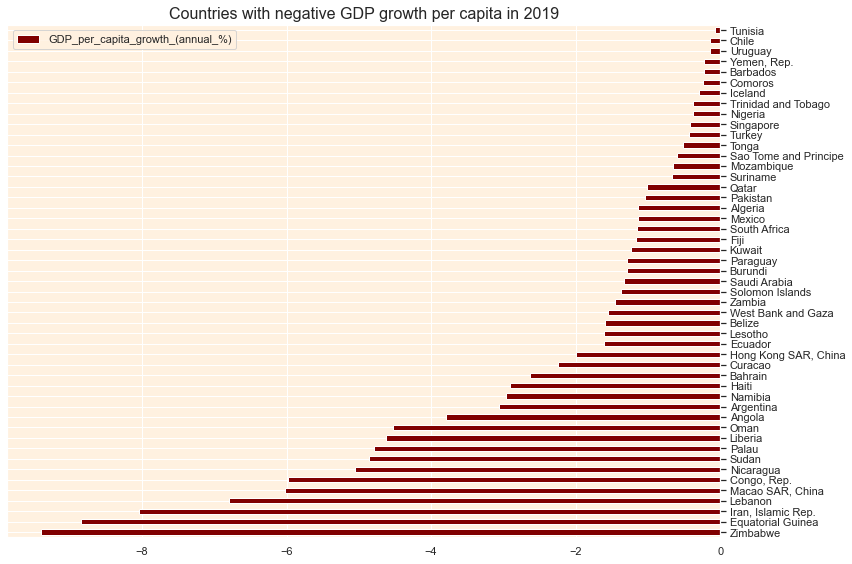

In [37]:
### countries with negative GDP growth per capita
print('-'*70)
n = len(gdp[(gdp['country']!='World') & 
    (gdp["GDP_per_capita_growth_(annual_%)"] < 0) & 
    (gdp['year']==str(end))])

print(f'{n} countries had negative per capita GDP growth in {end}')
print('')

gdp[(gdp['country']!='World') & 
    (gdp["GDP_per_capita_growth_(annual_%)"] < 0) & 
    (gdp['year']==str(end))].\
    sort_values("GDP_per_capita_growth_(annual_%)").\
    plot(kind='barh', figsize=(12,8), 
         x='country', y='GDP_per_capita_growth_(annual_%)', 
         xlabel='', color='maroon')
plt.gca().yaxis.tick_right()
plt.title(f"Countries with negative GDP growth per capita in {end}", fontsize=16)
plt.tight_layout()
plt.show();

----------------------------------------------------------------------
13 countries had per capita GDP growth in 2019 above 5 %



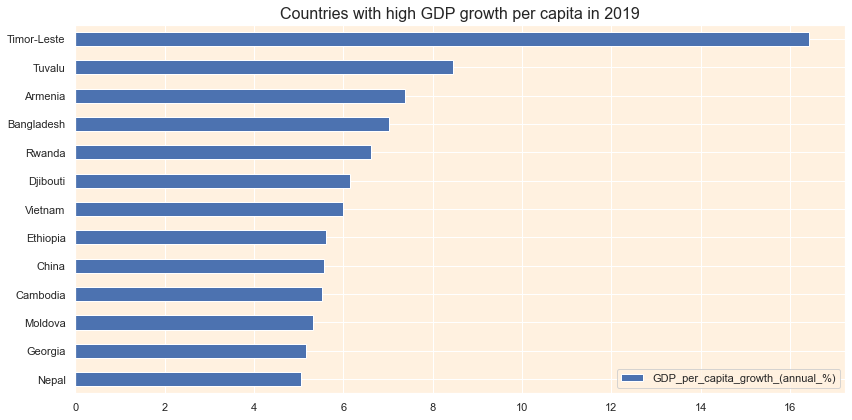

In [38]:
### countries with highest GDP growth per capita
print('-'*70)
l = len(gdp[(gdp['country']!='World') & 
    (gdp["GDP_per_capita_growth_(annual_%)"] > 5) & 
    (gdp['year']==str(end))])

print(f'{l} countries had per capita GDP growth in {end} above 5 %')
print('')

gdp[(gdp['country']!='World') & 
    (gdp["GDP_per_capita_growth_(annual_%)"] > 5) & 
    (gdp['year']==str(end))].\
    sort_values("GDP_per_capita_growth_(annual_%)").\
    plot(kind='barh', figsize=(12,6), 
         x='country', y='GDP_per_capita_growth_(annual_%)', 
         xlabel='')
plt.title(f"Countries with high GDP growth per capita in {end}", fontsize=16)
plt.tight_layout()
plt.show();

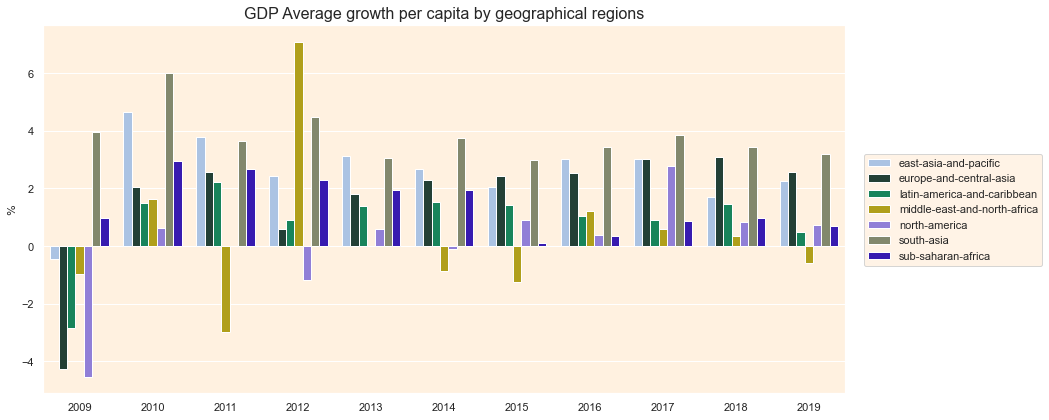

In [39]:
fig = plt.figure(figsize=(12,6))

sns.barplot(x = 'year', 
             y = "GDP_per_capita_growth_(annual_%)", 
             hue = 'region', 
             data = gdp.groupby(['year','region'])["GDP_per_capita_growth_(annual_%)"].mean().reset_index(), 
             palette=region_colors)

plt.gca().get_legend().remove()
plt.xlabel('')
plt.ylabel('%')
plt.title("GDP Average growth per capita by geographical regions", fontsize=16)

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.tight_layout()
plt.show()

In [40]:
### GDP growth per capita for MENA region
print('-'*70)
print(f'GDP per capita growth for MENA region, {end}')
print('')

gdp[(gdp['region']=='middle-east-and-north-africa') & 
    (gdp['year']=='2019')][['country','GDP_per_capita_growth_(annual_%)']].\
    sort_values('GDP_per_capita_growth_(annual_%)', ascending=False).dropna()

----------------------------------------------------------------------
GDP per capita growth for MENA region, 2019



,country,GDP_per_capita_growth_(annual_%)
1111,Djibouti,6.149888
1155,"Egypt, Arab Rep.",3.492043
1529,Iraq,2.073899
1562,Israel,1.515166
1760,Libya,1.039924
1980,Morocco,1.036396
1870,Malta,0.875078
1606,Jordan,0.485101
2761,United Arab Emirates,0.225275
2684,Tunisia,-0.075972


In [41]:
### GDP growth per capita for South asia region
print('-'*70)
print(f"South Asia per capita GDP growth in {end}")
print('')
gdp[(gdp['region']=='south-asia') & 
    (gdp['year']=='2019')][['country','GDP_per_capita_growth_(annual_%)']].\
    sort_values('GDP_per_capita_growth_(annual_%)', ascending=False).dropna()

----------------------------------------------------------------------
South Asia per capita GDP growth in 2019



,country,GDP_per_capita_growth_(annual_%)
682,Bangladesh,7.031584
2035,Nepal,5.043372
759,Bhutan,4.262400
1848,Maldives,3.912400
1496,India,3.128532
2497,Sri Lanka,1.659528
517,Afghanistan,1.536912
2156,Pakistan,-1.039799


In [42]:
### GDP growth per capita for Latin America and Caribbean region
print('-'*70)
print(f"Latin America and Caribbean per capita GDP growth in {end}")
print('')
gdp[(gdp['region']=='latin-america-and-caribbean') & 
    (gdp['year']=='2019')][['country','GDP_per_capita_growth_(annual_%)']].\
    sort_values('GDP_per_capita_growth_(annual_%)', ascending=False).dropna()

----------------------------------------------------------------------
Latin America and Caribbean per capita GDP growth in 2019



,country,GDP_per_capita_growth_(annual_%)
1430,Guyana,4.846502
1133,Dominican Republic,3.958571
2717,Turks and Caicos Islands,3.873935
583,Antigua and Barbuda,3.762049
1122,Dominica,3.292833
1397,Guatemala,2.237097
2508,St. Kitts and Nevis,2.071981
979,Colombia,1.868656
1166,El Salvador,1.861865
1375,Grenada,1.414738


In [43]:
### GDP growth per capita for North America region
print('-'*70)
print(f" North America per capita GDP growth in {end}")
print('')
gdp[(gdp['region']=='north-america') & 
    (gdp['year']=='2019')][['country','GDP_per_capita_growth_(annual_%)']].\
    sort_values('GDP_per_capita_growth_(annual_%)', ascending=False).dropna()

----------------------------------------------------------------------
 North America per capita GDP growth in 2019



,country,GDP_per_capita_growth_(annual_%)
2783,United States,1.678125
748,Bermuda,0.292004
902,Canada,0.227722


In [44]:
### GDP growth per capita for Sub Saharan Africa region
print('-'*70)
print(f"Sub Saharan Africa per capita GDP growth in {end}")
print('')
gdp[(gdp['region']=='sub-saharan-africa') & 
    (gdp['year']=='2019')][['country','GDP_per_capita_growth_(annual_%)']].\
    sort_values('GDP_per_capita_growth_(annual_%)', ascending=False).dropna()

----------------------------------------------------------------------
Sub Saharan Africa per capita GDP growth in 2019



,country,GDP_per_capita_growth_(annual_%)
2299,Rwanda,6.612039
1221,Ethiopia,5.604511
869,Cabo Verde,4.482597
2376,Seychelles,4.381557
1331,Ghana,4.200437
737,Benin,4.003207
1034,Cote d'Ivoire,3.557735
2387,Sierra Leone,3.305752
2739,Uganda,3.072402
1892,Mauritania,3.067005


In [45]:
### GDP growth per capita for East Asia and Pacific region
print('-'*70)
print(f"East Asia and Pacific per capita GDP growth in {end}")
print('')
gdp[(gdp['region']=='east-asia-and-pacific') & 
    (gdp['year']=='2019')][['country','GDP_per_capita_growth_(annual_%)']].\
    sort_values('GDP_per_capita_growth_(annual_%)', ascending=False).dropna()

----------------------------------------------------------------------
East Asia and Pacific per capita GDP growth in 2019



,country,GDP_per_capita_growth_(annual_%)
2640,Timor-Leste,16.414735
2728,Tuvalu,8.455536
2838,Vietnam,5.994866
968,China,5.571841
880,Cambodia,5.516828
2222,Philippines,4.604007
1507,Indonesia,3.875166
2189,Papua New Guinea,3.851133
1958,Mongolia,3.367090
1705,Lao PDR,3.076180


In [46]:
### GDP growth per capita for Europe and Central Asia region
print('-'*70)
print(f"Europe and Central Asia per capita GDP growth in {end}")
print('')
gdp[(gdp['region']=='europe-and-central-asia') & 
    (gdp['year']=='2019')][['country','GDP_per_capita_growth_(annual_%)']].\
    sort_values('GDP_per_capita_growth_(annual_%)', ascending=False).dropna()

----------------------------------------------------------------------
Europe and Central Asia per capita GDP growth in 2019



,country,GDP_per_capita_growth_(annual_%)
605,Armenia,7.383362
1936,Moldova,5.329208
1309,Georgia,5.162619
2365,Serbia,4.809425
2277,Romania,4.724444
1672,Kosovo,4.649577
1474,Hungary,4.625529
1782,Lithuania,4.615416
1199,Estonia,4.607049
2233,Poland,4.566459


#### Country GDP Analysis

In [47]:
def country_gdp(country):
    
    print("-"*70)
    
    region = gdp[gdp['country'] == country][['region']].values[0]
    income_level = gdp[gdp['country'] == country][['income_level']].values[0]
    recent_gdp = gdp[(gdp['country'] == country)
                            & (gdp['year'] == str(end))][['GDP_(current_US$)_BLN']].values[0]
    
    print(f"""{country} 
    Region: {region[0]}
    Income level: {income_level[0]}
    GDP in {end}: {recent_gdp[0]} BLN
    """)

    print("-"*70)
    
    fig = plt.figure(figsize=(12,6))
    ax = plt.subplot(121)

    gdp[gdp['country'] == country].\
        sort_values('year').plot(kind='bar', 
                                 x='year', 
                                 y='GDP_(current_US$)_BLN',
                                 ax=ax, 
                                 xlabel='', 
                                 ylabel='BLN', 
                                 title=f"{country} GDP and GDP annual % growth")    

    gdp[gdp['country'] == country].\
        sort_values('year').plot(x='year', 
                                 y='GDP_growth_(annual_%)',
                                 ax=ax, xlabel='',
                                 secondary_y=True, 
                                 color='black')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08))


    ax = plt.subplot(122)
    gdp[gdp['country'] == country].\
        sort_values('year').plot(kind='bar', 
                                 x='year', 
                                 y="GDP_per_capita_PPP_(current_international_$)",
                                 ax=ax, 
                                 xlabel='', 
                                 ylabel='USD', 
                                 color='gold', 
                                 rot=0,
                                 title=f"{country} GDP per capita")    

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08))

    plt.tight_layout()
    return plt.show()    

----------------------------------------------------------------------
United Arab Emirates 
    Region: middle-east-and-north-africa
    Income level: high-income
    GDP in 2019: 421.14226793765005 BLN
    
----------------------------------------------------------------------


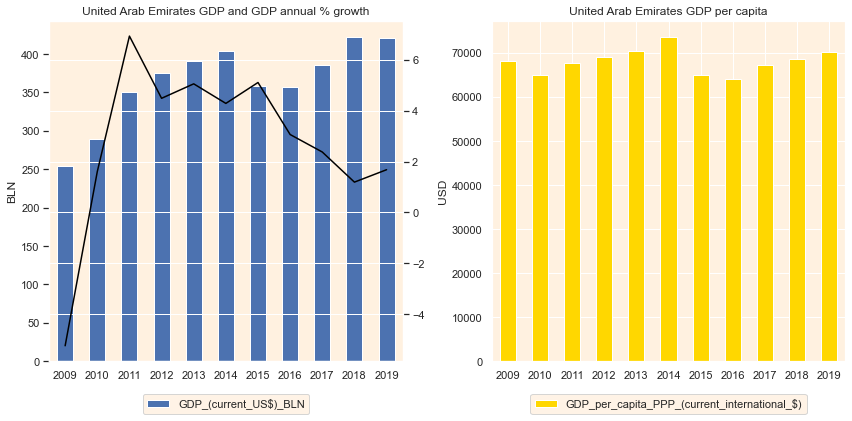

In [48]:
country_gdp("United Arab Emirates")

### GROSS CAPITAL FORMATION as % of GDP

(NE.GDI.TOTL.ZS: Gross capital formation (% of GDP))


Gross capital formation (formerly gross domestic investment) consists of outlays on additions to the fixed assets of the economy plus net changes in the level of inventories.  

Fixed assets include land improvements (fences, ditches, drains, and so on); plant, machinery, and equipment purchases; and the construction of roads, railways, and the like, including schools, offices, hospitals, private residential dwellings, and commercial and industrial buildings.  

Inventories are stocks of goods held by firms to meet temporary or unexpected fluctuations in production or sales, and "work in progress." According to the 1993 SNA, net acquisitions of valuables are also considered capital formation.

#### Get Data

In [49]:
### gross capital formation as % of GDP data from world bank via API
start = 2009
end = 2019 # data for 2020 is not available yet
capital_df, capital_list = get_data('NE.GDI.TOTL.ZS', end, start)
capital_df.tail(3)

,year,country,Gross_capital_formation_(%_of_GDP),region,income_level
2901,2011,Zimbabwe,17.397766,sub-saharan-africa,middle-income
2902,2010,Zimbabwe,18.763301,sub-saharan-africa,middle-income
2903,2009,Zimbabwe,12.746802,sub-saharan-africa,middle-income


#### World Capital formation by region and income levels

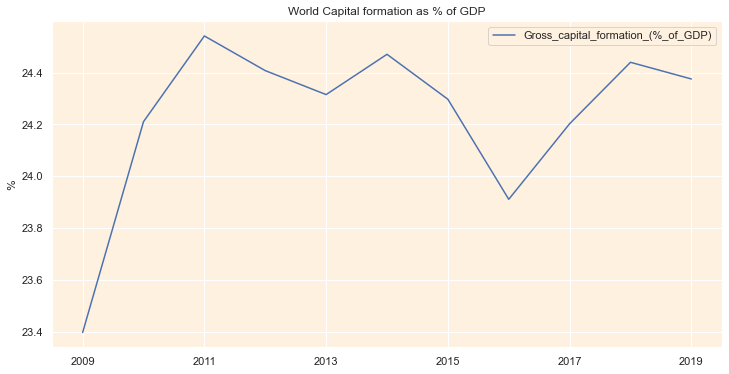

In [50]:
capital_df[capital_df['country']=='World'].\
    sort_values('year').plot(figsize=(12,6),
                             x='year', 
                             y='Gross_capital_formation_(%_of_GDP)', 
                             xlabel='', 
                             ylabel='%')
    
plt.title("World Capital formation as % of GDP")
plt.show();

In [51]:
print('-'*70)
print('Statistical summary of Capital Formation as % of GDP')
print('')
capital_df[(capital_df['country']!='World')].dropna()['Gross_capital_formation_(%_of_GDP)'].describe()

----------------------------------------------------------------------
Statistical summary of Capital Formation as % of GDP



count    1878.000000
mean       24.525404
std         8.816044
min        -0.098400
25%        19.329802
50%        23.156107
75%        27.965159
max        77.890062
Name: Gross_capital_formation_(%_of_GDP), dtype: float64

In [52]:
### country with max capital formation
capital_df[(capital_df['country']!='World') & 
           (capital_df['Gross_capital_formation_(%_of_GDP)'] == max(capital_df['Gross_capital_formation_(%_of_GDP)']))]

,year,country,Gross_capital_formation_(%_of_GDP),region,income_level
1016,2015,"Congo, Rep.",77.890062,sub-saharan-africa,middle-income


In [53]:
### countries with max capital formation
capital_df[(capital_df['country']!='World') & 
           (capital_df['Gross_capital_formation_(%_of_GDP)'] == min(capital_df['Gross_capital_formation_(%_of_GDP)']))]

,year,country,Gross_capital_formation_(%_of_GDP),region,income_level
1115,2015,Djibouti,-0.0984,middle-east-and-north-africa,middle-income


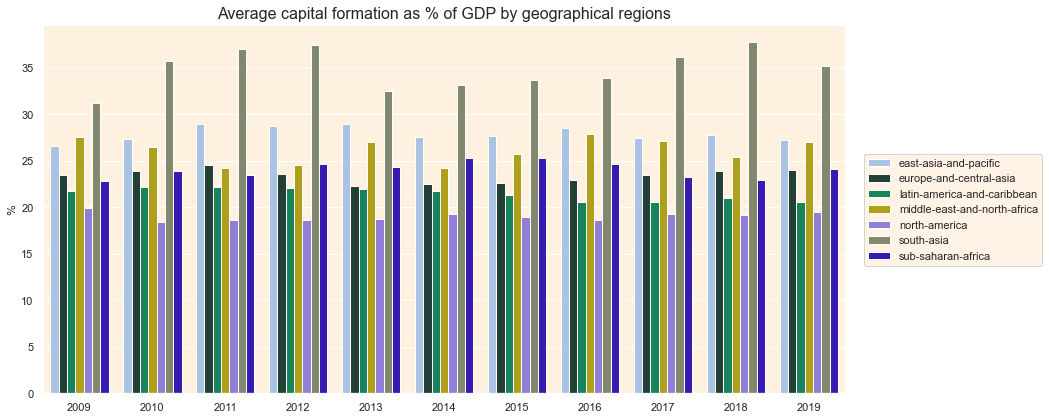

In [54]:
### Average capital formation as % of GDP by Geographical Region

fig = plt.figure(figsize=(12,6))

sns.barplot(x = 'year', 
             y = "Gross_capital_formation_(%_of_GDP)", 
             hue = 'region', 
             data = capital_df.groupby(['year','region'])["Gross_capital_formation_(%_of_GDP)"].mean().reset_index(), 
             palette=region_colors)

plt.gca().get_legend().remove()
plt.xlabel('')
plt.ylabel('%')
plt.title("Average capital formation as % of GDP by geographical regions", fontsize=16)

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.tight_layout()
plt.show()

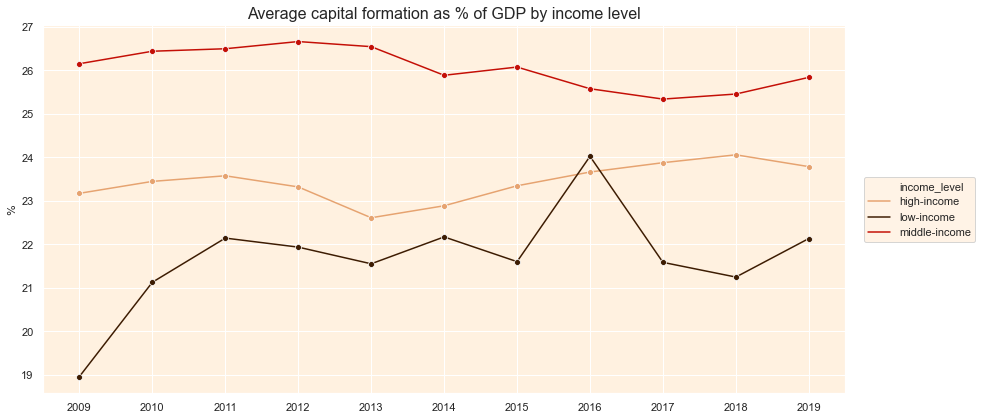

In [55]:
### Average capital formation as % of GDP by income level

fig = plt.figure(figsize=(12,6))

sns.lineplot(x = 'year', 
             y = "Gross_capital_formation_(%_of_GDP)", 
             hue = 'income_level', 
             data = capital_df.groupby(['year','income_level'])["Gross_capital_formation_(%_of_GDP)"].mean().reset_index(), 
             marker='o', palette=income_colors)

plt.gca().get_legend().remove()
plt.xlabel('')
plt.ylabel('%')
plt.title("Average capital formation as % of GDP by income level", fontsize=16)

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.tight_layout()
plt.show()

#### Countries with highest and lowest capital formation

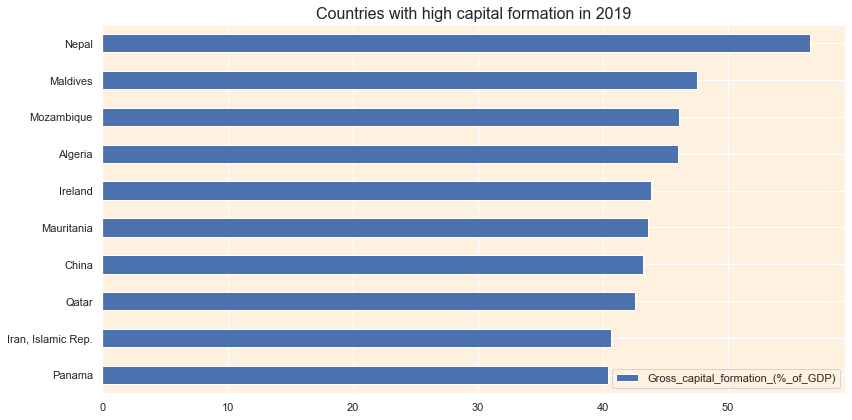

In [56]:
### countries with high capital formation, greater than 40% of GDP
capital_df[(capital_df['country']!='World') & 
    (capital_df["Gross_capital_formation_(%_of_GDP)"] > 40) & 
    (capital_df['year']=='2019')].\
    sort_values("Gross_capital_formation_(%_of_GDP)").\
    plot(kind='barh', figsize=(12,6), 
         x='country', y='Gross_capital_formation_(%_of_GDP)', 
         xlabel='')

plt.title(f"Countries with high capital formation in {end}", fontsize=16)
plt.tight_layout()
plt.show();

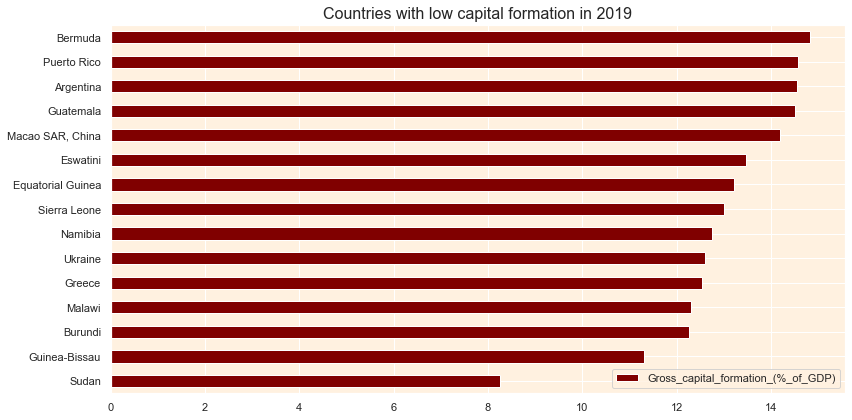

In [57]:
### countries with LOW capital formation, less than 10% of GDP
capital_df[(capital_df['country']!='World') & 
    (capital_df["Gross_capital_formation_(%_of_GDP)"] < 15) & 
    (capital_df['year']=='2019')].\
    sort_values("Gross_capital_formation_(%_of_GDP)").\
    plot(kind='barh', figsize=(12,6), 
         x='country', y='Gross_capital_formation_(%_of_GDP)', 
         xlabel='', color='maroon')

plt.title(f"Countries with low capital formation in {end}", fontsize=16)
plt.tight_layout()
plt.show();

#### Comparison of country GDP growth rate and capital formation as % of GDP

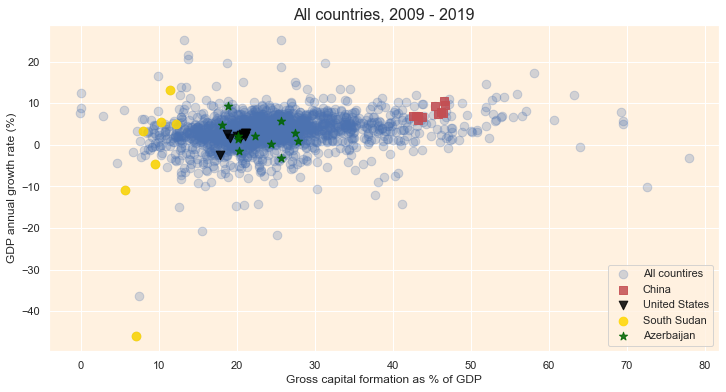

In [58]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1, 1, 1)

ax.scatter(capital_df[capital_df['country']!='World'].\
           sort_values('year')['Gross_capital_formation_(%_of_GDP)'],
           gdp[gdp['country']!='World'].\
           sort_values('year')['GDP_growth_(annual_%)'], 
           s=75, alpha=0.25, label='All countires')

ax.scatter(capital_df[capital_df['country']=='China'].\
           sort_values('year')['Gross_capital_formation_(%_of_GDP)'], 
           gdp[gdp['country']=='China'].\
           sort_values('year')['GDP_growth_(annual_%)'], c='r', 
           marker='s', s=75, alpha=0.85, label='China',
          )


ax.scatter(capital_df[capital_df['country']=='United States'].\
           sort_values('year')['Gross_capital_formation_(%_of_GDP)'], 
           gdp[gdp['country']=='United States'].\
           sort_values('year')['GDP_growth_(annual_%)'], c='black', 
           marker='v', s=75, alpha=0.85, label='United States',
          )


ax.scatter(capital_df[capital_df['country']=='South Sudan'].\
           sort_values('year')['Gross_capital_formation_(%_of_GDP)'], 
           gdp[gdp['country']=='South Sudan'].\
           sort_values('year')['GDP_growth_(annual_%)'], c='gold', 
           marker='o', s=75, alpha=0.85, label='South Sudan',
          )

ax.scatter(capital_df[capital_df['country']=='Azerbaijan'].\
           sort_values('year')['Gross_capital_formation_(%_of_GDP)'], 
           gdp[gdp['country']=='Azerbaijan'].\
           sort_values('year')['GDP_growth_(annual_%)'], c='darkgreen', 
           marker='*', s=75, alpha=0.85, label='Azerbaijan',
          )

ax.legend(scatterpoints=1,loc='lower right')

ax.set_xlabel("Gross capital formation as % of GDP")
ax.set_ylabel("GDP annual growth rate (%)")

plt.title(f"All countries, {start} - {end}", fontsize=16)

plt.show();

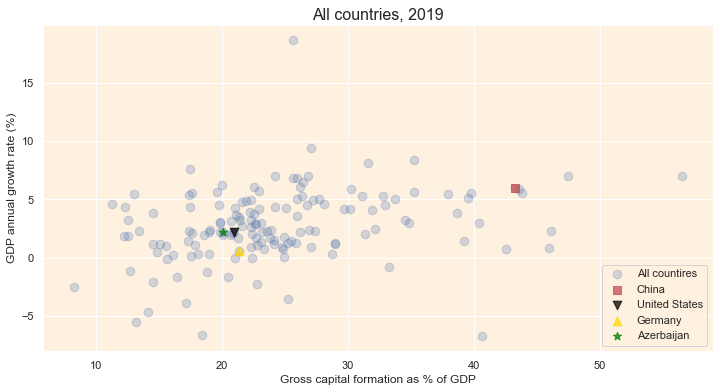

In [59]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1, 1, 1)

ax.scatter(capital_df[(capital_df['country']!='World')&(capital_df['year']=='2019')]\
           ['Gross_capital_formation_(%_of_GDP)'],
           gdp[(gdp['country']!='World')&(gdp['year']=='2019')]\
           ['GDP_growth_(annual_%)'], 
           s=75, alpha=0.25, label='All countires')

ax.scatter(capital_df[(capital_df['country']=='China')&(capital_df['year']=='2019')]\
           ['Gross_capital_formation_(%_of_GDP)'], 
           gdp[(gdp['country']=='China')&(gdp['year']=='2019')]\
           ['GDP_growth_(annual_%)'], c='r', 
           marker='s', s=75, alpha=0.75, label='China',
          )


ax.scatter(capital_df[(capital_df['country']=='United States')&(capital_df['year']=='2019')]\
           ['Gross_capital_formation_(%_of_GDP)'], 
           gdp[(gdp['country']=='United States')&(gdp['year']=='2019')]\
           ['GDP_growth_(annual_%)'], c='black', 
           marker='v', s=75, alpha=0.75, label='United States',
          )


ax.scatter(capital_df[(capital_df['country']=='Germany')&(capital_df['year']=='2019')]\
           ['Gross_capital_formation_(%_of_GDP)'], 
           gdp[(gdp['country']=='Germany')&(gdp['year']=='2019')]\
           ['GDP_growth_(annual_%)'], c='gold', 
           marker='^', s=75, alpha=0.75, label='Germany',
          )

ax.scatter(capital_df[(capital_df['country']=='Azerbaijan')&(capital_df['year']=='2019')]\
           ['Gross_capital_formation_(%_of_GDP)'], 
           gdp[(gdp['country']=='Azerbaijan')&(gdp['year']=='2019')]\
           ['GDP_growth_(annual_%)'], c='green', 
           marker='*', s=75, alpha=0.75, label='Azerbaijan',
          )

ax.legend(scatterpoints=1,loc='lower right')

ax.set_xlabel("Gross capital formation as % of GDP")
ax.set_ylabel("GDP annual growth rate (%)")

plt.title(f"All countries, {end}", fontsize=16)
plt.show();

In [61]:
def country_gdp_capital(country):
    
    print("-"*70)
    
    region = capital_df[capital_df['country'] == country][['region']].values[0]
    income_level = capital_df[capital_df['country'] == country][['income_level']].values[0]
    recent_capital = capital_df[(capital_df['country'] == country)
                            & (capital_df['year'] == str(end))][['Gross_capital_formation_(%_of_GDP)']].values[0]
    
    print(f"""{country} 
    Region: {region[0]}
    Income level: {income_level[0]}
    Capital formation in {end}: {recent_capital[0]} % of GDP
    """)

    print("-"*70)
    
    fig = plt.figure(figsize=(12,6))
    ax = plt.subplot(111)

    capital_df[capital_df['country'] == country].\
        sort_values('year').plot(x='year', 
                                 y='Gross_capital_formation_(%_of_GDP)',
                                 ax=ax, 
                                 xlabel='', 
                                 ylabel='%')
    
    capital_df[capital_df['country'] == 'World'].\
        sort_values('year').plot(x='year', 
                                 y='Gross_capital_formation_(%_of_GDP)',
                                 ax=ax, 
                                 xlabel='', 
                                 ylabel='%',
                                 color='maroon', 
                                 linestyle='dashed',
                                 label='World average capital formation rate')    

    gdp[gdp['country'] == country].\
        sort_values('year').plot(x='year', 
                                 y='GDP_growth_(annual_%)',
                                 ax=ax, 
                                 xlabel='',
                                 color='black')
    
    gdp[gdp['country'] == 'World'].\
        sort_values('year').plot(x='year', 
                                 y='GDP_growth_(annual_%)',
                                 ax=ax, 
                                 xlabel='',
                                 color='darkgreen', linestyle='dashed',
                                 label='World average GDP growth rate')
    
    plt.title(f"{country}: Capital formation as % of GDP\nand GDP annual % growth", fontsize=16)

    plt.tight_layout()
    return plt.show()    

----------------------------------------------------------------------
Azerbaijan 
    Region: europe-and-central-asia
    Income level: middle-income
    Capital formation in 2019: 20.1404243336884 % of GDP
    
----------------------------------------------------------------------


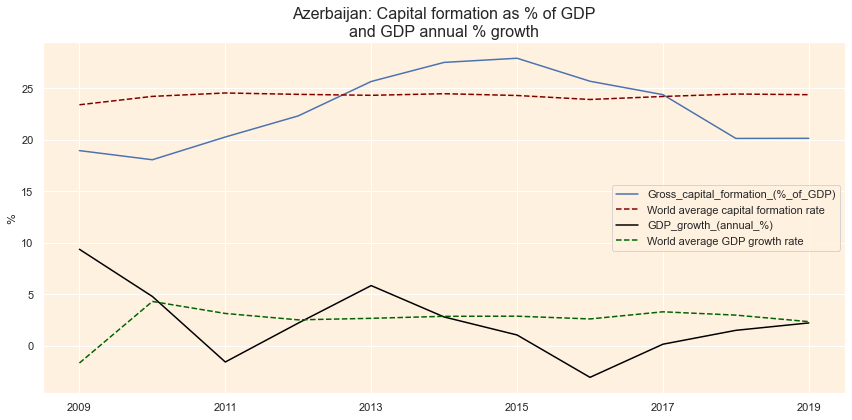

In [62]:
country_gdp_capital("Azerbaijan")

----------------------------------------------------------------------
China 
    Region: east-asia-and-pacific
    Income level: high-income
    Capital formation in 2019: 43.2511057438243 % of GDP
    
----------------------------------------------------------------------


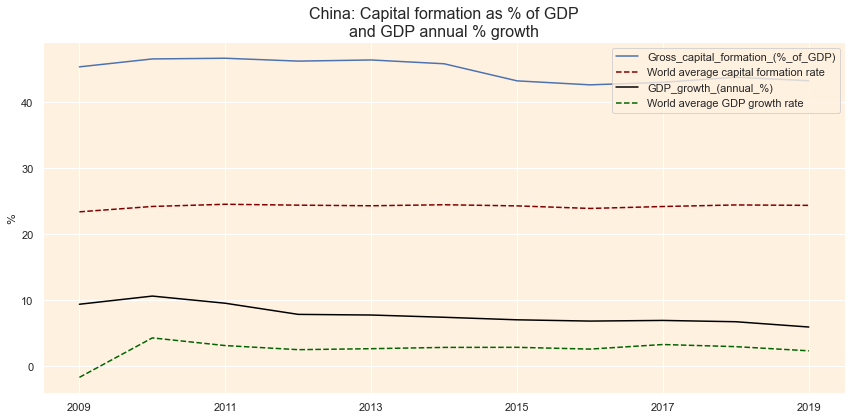

In [63]:
country_gdp_capital("China")

----------------------------------------------------------------------
United States 
    Region: north-america
    Income level: high-income
    Capital formation in 2019: 21.0142887496264 % of GDP
    
----------------------------------------------------------------------


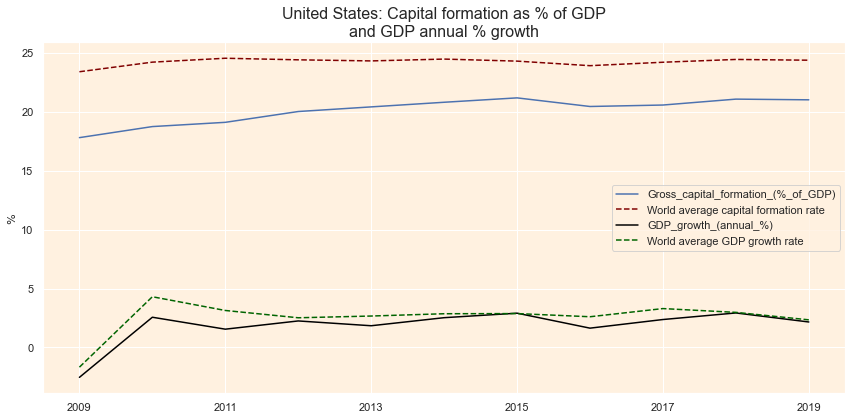

In [64]:
country_gdp_capital("United States")